In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from matplotlib.pyplot import figure
import keras;
import tensorflow as tf;
from keras.preprocessing.sequence import TimeseriesGenerator;
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
!python -m pip install prophet
from prophet import Prophet


df_TSLA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')#, index_col = 'Date')
# df_AAPL = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AAPL.csv')#, index_col = 'Date')
# df_ABNB = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ABNB.csv')#, index_col = 'Date')
# df_AMZN = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AMZN.csv')#, index_col = 'Date')
# df_BTC = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\BTC-USD.csv')#, index_col = 'Date')
# df_FDX = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\FDX.csv')#, index_col = 'Date')
# df_IBM = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\IBM.csv')#, index_col = 'Date')
# df_MSFT = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\MSFT.csv')#, index_col = 'Date')
# df_NVDA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\NVDA.csv')#, index_col = 'Date')
# df_ORCL = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ORCL.csv')#, index_col = 'Date')
# df_GOOG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\GOOG.csv')#, index_col = 'Date')


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# df_TSLA_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_future.csv')#, index_col = 'Date')
# df_AAPL_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AAPL_future.csv')#, index_col = 'Date')
# df_ABNB_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ABNB_future.csv')#, index_col = 'Date')
# df_AMZN_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AMZN_future.csv')#, index_col = 'Date')
# df_BTC_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\BTC-USD_future.csv')#, index_col = 'Date')
# df_FDX_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\FDX_future.csv')#, index_col = 'Date')
# df_IBM_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\IBM_future.csv')#, index_col = 'Date')
# df_MSFT_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\MSFT_future.csv')#, index_col = 'Date')
# df_NVDA_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\NVDA_future.csv')#, index_col = 'Date')
# df_ORCL_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ORCL_future.csv')#, index_col = 'Date')
# df_GOOG_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\GOOG_future.csv')#, index_col = 'Date')

In [3]:
df_TSLA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_comp.csv')#, index_col = 'Date')
# df_AAPL_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AAPL_comp.csv')#, index_col = 'Date')
# df_ABNB_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ABNB_comp.csv')#, index_col = 'Date')
# df_AMZN_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AMZN_comp.csv')#, index_col = 'Date')
# df_BTC_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\BTC-USD_comp.csv')#, index_col = 'Date')
# df_FDX_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\FDX_comp.csv')#, index_col = 'Date')
# df_IBM_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\IBM_comp.csv')#, index_col = 'Date')
# df_MSFT_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\MSFT_comp.csv')#, index_col = 'Date')
# df_NVDA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\NVDA_comp.csv')#, index_col = 'Date')
# df_ORCL_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ORCL_comp.csv')#, index_col = 'Date')
# df_GOOG_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\GOOG_comp.csv')#, index_col = 'Date')

In [4]:
# df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);df_TSLA.set_axis(df_TSLA['Date'], inplace=True);
# df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date']);df_AAPL.set_axis(df_AAPL['Date'], inplace=True);
# df_ABNB['Date'] = pd.to_datetime(df_ABNB['Date']);df_ABNB.set_axis(df_ABNB['Date'], inplace=True);
# df_AMZN['Date'] = pd.to_datetime(df_AMZN['Date']);df_AMZN.set_axis(df_AMZN['Date'], inplace=True);
# df_BTC['Date'] = pd.to_datetime(df_BTC['Date']);df_BTC.set_axis(df_BTC['Date'], inplace=True);
# df_FDX['Date'] = pd.to_datetime(df_FDX['Date']);df_FDX.set_axis(df_FDX['Date'], inplace=True);
# df_IBM['Date'] = pd.to_datetime(df_IBM['Date']);df_IBM.set_axis(df_IBM['Date'], inplace=True);
# df_MSFT['Date'] = pd.to_datetime(df_MSFT['Date']);df_MSFT.set_axis(df_MSFT['Date'], inplace=True);
# df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date']);df_NVDA.set_axis(df_NVDA['Date'], inplace=True);
# df_ORCL['Date'] = pd.to_datetime(df_ORCL['Date']);df_ORCL.set_axis(df_ORCL['Date'], inplace=True);
# df_GOOG['Date'] = pd.to_datetime(df_GOOG['Date']);df_GOOG.set_axis(df_GOOG['Date'], inplace=True);

In [5]:
# df_TSLA_future['Date'] = pd.to_datetime(df_TSLA_future['Date']);df_TSLA_future.set_axis(df_TSLA_future['Date'], inplace=True);
# df_AAPL_future['Date'] = pd.to_datetime(df_AAPL_future['Date']);df_AAPL_future.set_axis(df_AAPL_future['Date'], inplace=True);
# df_ABNB_future['Date'] = pd.to_datetime(df_ABNB_future['Date']);df_ABNB_future.set_axis(df_ABNB_future['Date'], inplace=True);
# df_AMZN_future['Date'] = pd.to_datetime(df_AMZN_future['Date']);df_AMZN_future.set_axis(df_AMZN_future['Date'], inplace=True);
# df_BTC_future['Date'] = pd.to_datetime(df_BTC_future['Date']);df_BTC_future.set_axis(df_BTC_future['Date'], inplace=True);
# df_FDX_future['Date'] = pd.to_datetime(df_FDX_future['Date']);df_FDX_future.set_axis(df_FDX_future['Date'], inplace=True);
# df_IBM_future['Date'] = pd.to_datetime(df_IBM_future['Date']);df_IBM_future.set_axis(df_IBM_future['Date'], inplace=True);
# df_MSFT_future['Date'] = pd.to_datetime(df_MSFT_future['Date']);df_MSFT_future.set_axis(df_MSFT_future['Date'], inplace=True);
# df_NVDA_future['Date'] = pd.to_datetime(df_NVDA_future['Date']);df_NVDA_future.set_axis(df_NVDA_future['Date'], inplace=True);
# df_ORCL_future['Date'] = pd.to_datetime(df_ORCL_future['Date']);df_ORCL_future.set_axis(df_ORCL_future['Date'], inplace=True);
# df_GOOG_future['Date'] = pd.to_datetime(df_GOOG_future['Date']);df_GOOG_future.set_axis(df_GOOG_future['Date'], inplace=True);

In [6]:
# df_TSLA_comp['Date'] = pd.to_datetime(df_TSLA_comp['Date']);df_TSLA_comp.set_axis(df_TSLA_comp['Date'], inplace=True);
# df_AAPL_comp['Date'] = pd.to_datetime(df_AAPL_comp['Date']);df_AAPL_comp.set_axis(df_AAPL_comp['Date'], inplace=True);
# df_ABNB_comp['Date'] = pd.to_datetime(df_ABNB_comp['Date']);df_ABNB_comp.set_axis(df_ABNB_comp['Date'], inplace=True);
# df_AMZN_comp['Date'] = pd.to_datetime(df_AMZN_comp['Date']);df_AMZN_comp.set_axis(df_AMZN_comp['Date'], inplace=True);
# df_BTC_comp['Date'] = pd.to_datetime(df_BTC_comp['Date']);df_BTC_comp.set_axis(df_BTC_comp['Date'], inplace=True);
# df_FDX_comp['Date'] = pd.to_datetime(df_FDX_comp['Date']);df_FDX_comp.set_axis(df_FDX_comp['Date'], inplace=True);
# df_IBM_comp['Date'] = pd.to_datetime(df_IBM_comp['Date']);df_IBM_comp.set_axis(df_IBM_comp['Date'], inplace=True);
# df_MSFT_comp['Date'] = pd.to_datetime(df_MSFT_comp['Date']);df_MSFT_comp.set_axis(df_MSFT_comp['Date'], inplace=True);
# df_NVDA_comp['Date'] = pd.to_datetime(df_NVDA_comp['Date']);df_NVDA_comp.set_axis(df_NVDA_comp['Date'], inplace=True);
# df_ORCL_comp['Date'] = pd.to_datetime(df_ORCL_comp['Date']);df_ORCL_comp.set_axis(df_ORCL_comp['Date'], inplace=True);
# df_GOOG_comp['Date'] = pd.to_datetime(df_GOOG_comp['Date']);df_GOOG_comp.set_axis(df_GOOG_comp['Date'], inplace=True);

In [7]:
df_TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3397,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
3398,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300
3399,2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
3400,2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600


In [8]:
df_TSLA = df_TSLA.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);
#df_TSLA.rename(columns={'Date':'DS','Close':'Y'})

In [9]:
df_TSLA

,Date,Close
0,2010-06-30,1.588667
1,2010-07-01,1.464000
2,2010-07-02,1.280000
3,2010-07-06,1.074000
4,2010-07-07,1.053333
...,...,...
3397,2023-12-28,253.179993
3398,2023-12-29,248.479996
3399,2024-01-02,248.419998
3400,2024-01-03,238.449997


In [10]:
df_TSLA = df_TSLA.rename(columns={'Date':'ds','Close':'y'})

In [11]:
df_TSLA

,ds,y
0,2010-06-30,1.588667
1,2010-07-01,1.464000
2,2010-07-02,1.280000
3,2010-07-06,1.074000
4,2010-07-07,1.053333
...,...,...
3397,2023-12-28,253.179993
3398,2023-12-29,248.479996
3399,2024-01-02,248.419998
3400,2024-01-03,238.449997


In [12]:
m = Prophet()
m.fit(df_TSLA);

06:02:51 - cmdstanpy - INFO - Chain [1] start processing
06:02:52 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods = 30)
future

,ds
0,2010-06-30
1,2010-07-01
2,2010-07-02
3,2010-07-06
4,2010-07-07
...,...
3427,2024-01-30
3428,2024-01-31
3429,2024-02-01
3430,2024-02-02


In [14]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-06-30,-5.076923,-38.259802,26.860140
1,2010-07-01,-5.094418,-40.253605,27.777299
2,2010-07-02,-5.112405,-37.762121,29.517492
3,2010-07-06,-3.526978,-34.679051,29.279033
4,2010-07-07,-3.190076,-38.336328,29.081918
...,...,...,...,...
3427,2024-01-30,222.216671,189.079058,253.835774
3428,2024-01-31,222.424623,189.015484,255.450678
3429,2024-02-01,222.320805,188.491586,255.235469
3430,2024-02-02,222.229685,191.960246,254.628454


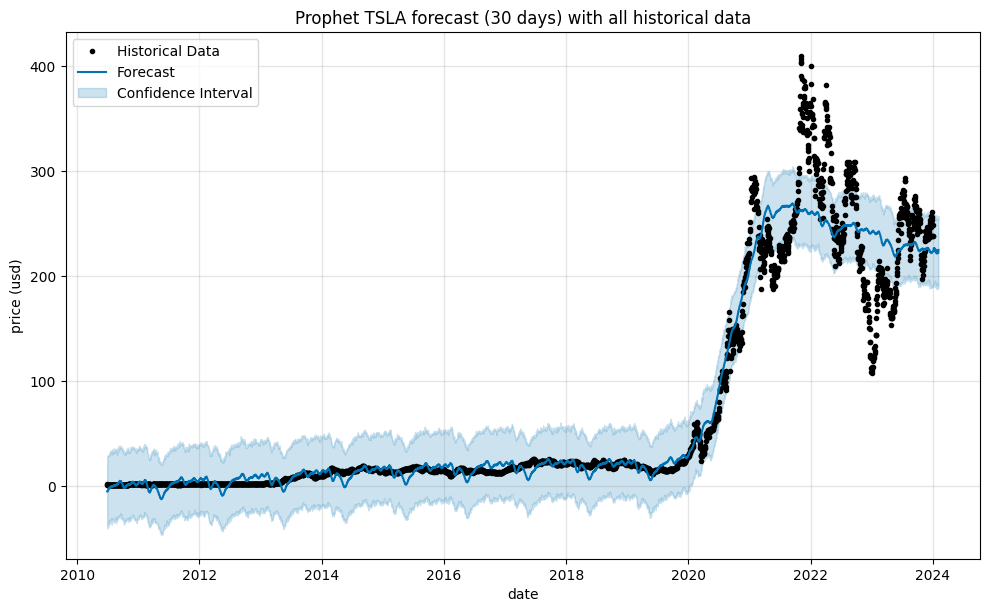

In [15]:
fig1 = m.plot(forecast)
plt.title("Prophet TSLA forecast (30 days) with all historical data");
plt.xlabel("date");
plt.ylabel("price (usd)");
plt.legend(["Historical Data", "Forecast", "Confidence Interval"], loc="best")

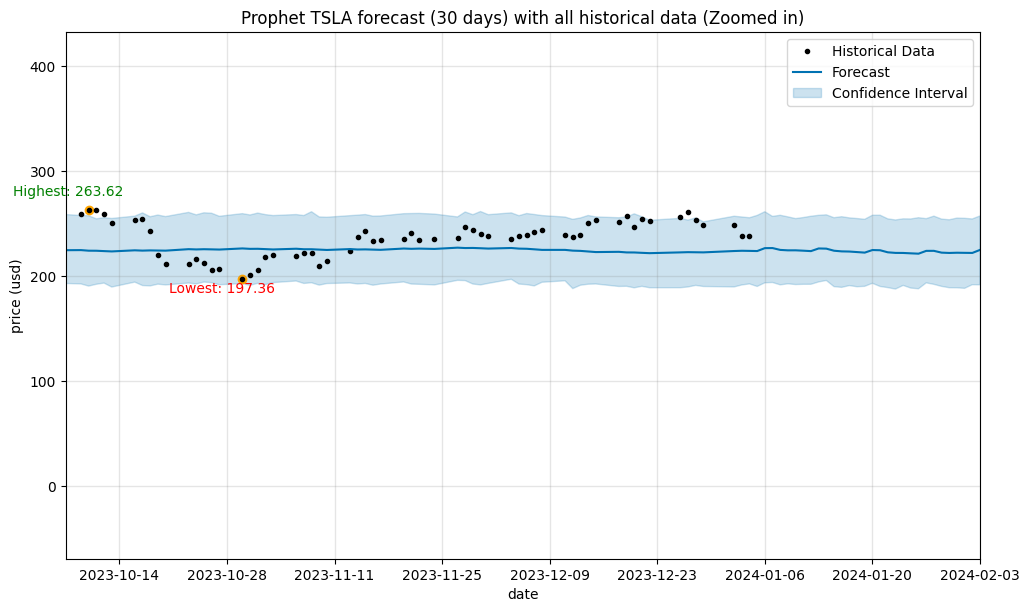

In [16]:
fig1 = m.plot(forecast)
plt.title("Prophet TSLA forecast (30 days) with all historical data (Zoomed in)");
plt.xlabel("date");
plt.ylabel("price (usd)");
plt.legend(["Historical Data", "Forecast", "Confidence Interval"], loc="best")
last_historical_date = df_TSLA['ds'].max()
start_date_90_days_ago = last_historical_date - pd.Timedelta(days=89)
plt.xlim(start_date_90_days_ago, forecast['ds'].max())
historical_data_last_90_days = df_TSLA[(df_TSLA['ds'] >= start_date_90_days_ago) & (df_TSLA['ds'] <= last_historical_date)]
lowest_point = historical_data_last_90_days.loc[historical_data_last_90_days['y'].idxmin()]
highest_point = historical_data_last_90_days.loc[historical_data_last_90_days['y'].idxmax()]
plt.scatter([lowest_point['ds'], highest_point['ds']], [lowest_point['y'], highest_point['y']], color='orange')  # Mark points
plt.annotate(f"Lowest: {lowest_point['y']:.2f}", (lowest_point['ds'], lowest_point['y']), textcoords="offset points", xytext=(-15,-10), ha='center', color='red')
plt.annotate(f"Highest: {highest_point['y']:.2f}", (highest_point['ds'], highest_point['y']), textcoords="offset points", xytext=(-15,10), ha='center', color='green')
plt.show()

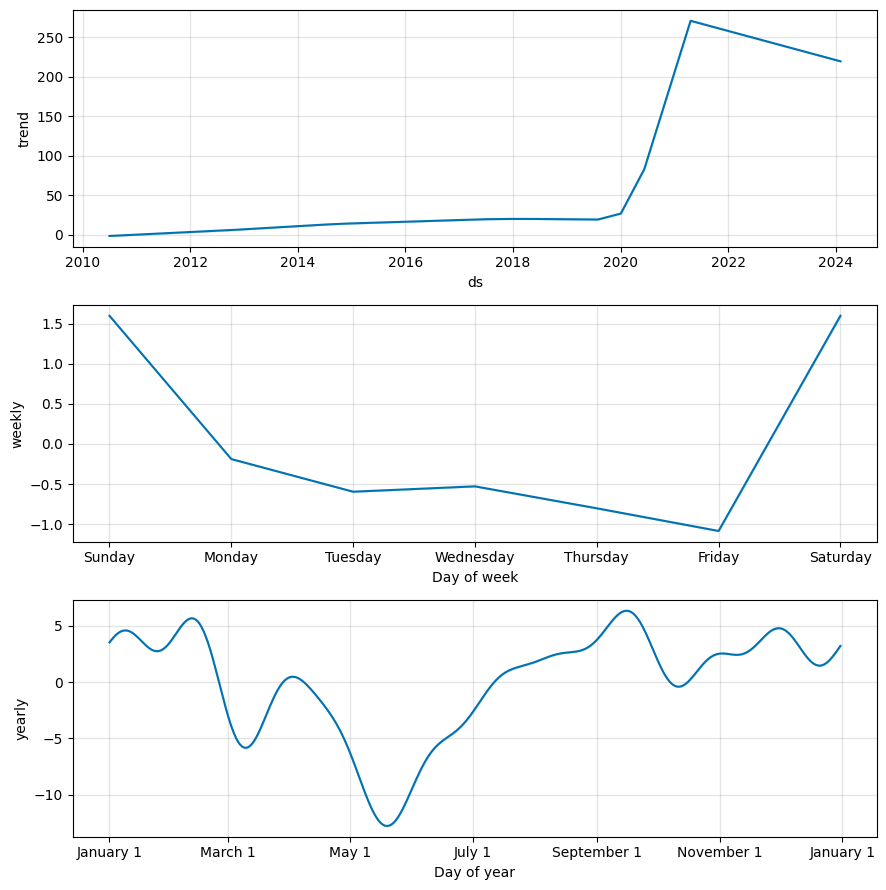

In [17]:
fig2 = m.plot_components(forecast)

In [18]:
df_TSLA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')#, index_col = 'Date')
# df_AAPL = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AAPL.csv')#, index_col = 'Date')
# df_ABNB = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ABNB.csv')#, index_col = 'Date')
# df_AMZN = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\AMZN.csv')#, index_col = 'Date')
# df_BTC = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\BTC-USD.csv')#, index_col = 'Date')
# df_FDX = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\FDX.csv')#, index_col = 'Date')
# df_IBM = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\IBM.csv')#, index_col = 'Date')
# df_MSFT = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\MSFT.csv')#, index_col = 'Date')
# df_NVDA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\NVDA.csv')#, index_col = 'Date')
# df_ORCL = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\ORCL.csv')#, index_col = 'Date')
# df_GOOG = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\GOOG.csv')#, index_col = 'Date')

In [19]:
df_TSLA = df_TSLA.drop(labels=range(0, len(df_TSLA.index)-127), axis=0)
df_TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
3275,2023-07-06,278.089996,279.970001,272.880005,276.540009,276.540009,120332100
3276,2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000
3277,2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400
3278,2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400
3279,2023-07-12,276.329987,276.519989,271.459991,271.989990,271.989990,95672100
...,...,...,...,...,...,...,...
3397,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
3398,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300
3399,2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
3400,2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600


In [20]:
df_TSLA = df_TSLA.drop(labels=range(0, len(df_TSLA.index)-127), axis=0) #127
# df_AAPL = df_AAPL.drop(labels=range(0, len(df_AAPL.index)-127), axis=0)
# df_ABNB = df_ABNB.drop(labels=range(0, len(df_ABNB.index)-127), axis=0)
# df_AMZN = df_AMZN.drop(labels=range(0, len(df_AMZN.index)-127), axis=0)
# df_BTC = df_BTC.drop(labels=range(0, len(df_BTC.index)-127), axis=0)
# df_FDX = df_FDX.drop(labels=range(0, len(df_FDX.index)-127), axis=0)
# df_IBM = df_IBM.drop(labels=range(0, len(df_IBM.index)-127), axis=0)
# df_MSFT = df_MSFT.drop(labels=range(0, len(df_MSFT.index)-127), axis=0)
# df_NVDA = df_NVDA.drop(labels=range(0, len(df_NVDA.index)-127), axis=0)
# df_ORCL = df_ORCL.drop(labels=range(0, len(df_ORCL.index)-127), axis=0)
# df_GOOG = df_GOOG.drop(labels=range(0, len(df_GOOG.index)-127), axis=0)

In [21]:
df_TSLA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_comp.csv', index_col = 'Date')
df_TSLA_comp.index = pd.to_datetime(df_TSLA_comp.index);
df_TSLA_comp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300
2024-01-05,236.860001,240.119995,234.899994,237.490005,237.490005,92379400
2024-01-08,236.139999,241.250000,235.300003,240.449997,240.449997,85166600
2024-01-09,238.110001,238.960007,232.039993,234.960007,234.960007,96705700
2024-01-10,235.100006,235.500000,231.289993,233.940002,233.940002,91628500
2024-01-11,230.570007,230.929993,225.369995,227.220001,227.220001,105873600
2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000
2024-01-16,215.100006,223.490005,212.179993,219.910004,219.910004,115355000
2024-01-17,214.860001,215.669998,212.009995,215.550003,215.550003,103164400


In [22]:
df_TSLA = df_TSLA.drop(['Open','High','Low','Adj Close','Volume'], axis = 1)
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);
#df_TSLA.rename(columns={'Date':'DS','Close':'Y'})
df_TSLA

,Date,Close
3275,2023-07-06,276.540009
3276,2023-07-07,274.429993
3277,2023-07-10,269.609985
3278,2023-07-11,269.790009
3279,2023-07-12,271.989990
...,...,...
3397,2023-12-28,253.179993
3398,2023-12-29,248.479996
3399,2024-01-02,248.419998
3400,2024-01-03,238.449997


In [23]:
df_TSLA = df_TSLA.rename(columns={'Date':'ds','Close':'y'})
m = Prophet()
m.fit(df_TSLA);
future = m.make_future_dataframe(periods = 30)
future

06:02:55 - cmdstanpy - INFO - Chain [1] start processing
06:02:55 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2023-07-06
1,2023-07-07
2,2023-07-10
3,2023-07-11
4,2023-07-12
...,...
152,2024-01-30
153,2024-01-31
154,2024-02-01
155,2024-02-02


In [24]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-07-06,268.379678,247.621955,288.066023
1,2023-07-07,267.361912,247.164556,285.604425
2,2023-07-10,268.008823,249.634478,288.331365
3,2023-07-11,270.231491,249.856179,289.489540
4,2023-07-12,268.415674,250.350969,288.054675
...,...,...,...,...
152,2024-01-30,257.226414,237.580453,274.587406
153,2024-01-31,256.018725,237.244855,276.043965
154,2024-02-01,254.251742,233.054217,274.710222
155,2024-02-02,253.842104,233.787807,272.393161


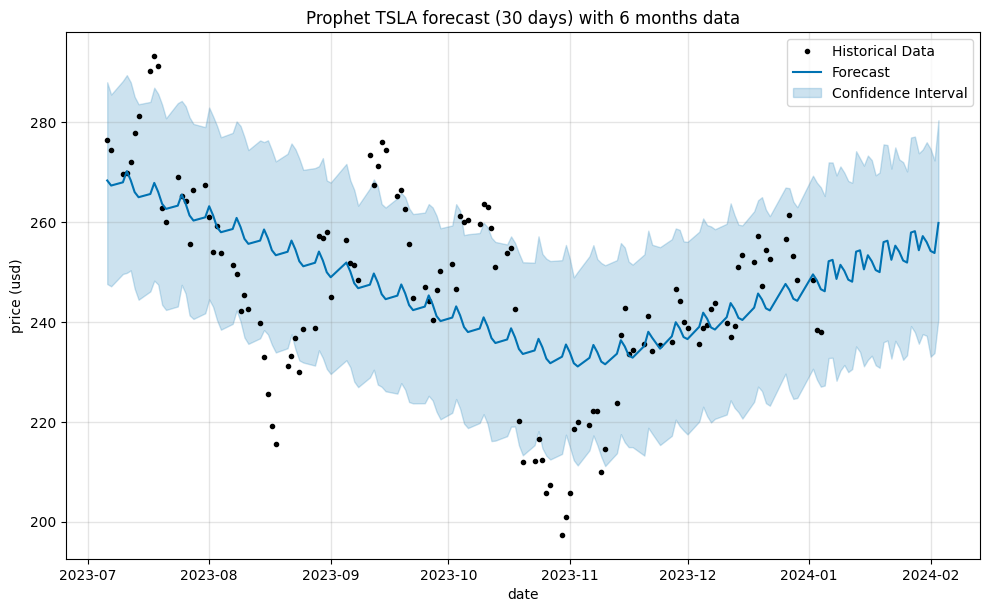

In [25]:
fig1 = m.plot(forecast)
plt.title("Prophet TSLA forecast (30 days) with 6 months data");
plt.xlabel("date");
plt.ylabel("price (usd)");
plt.legend(["Historical Data", "Forecast", "Confidence Interval"], loc="best")

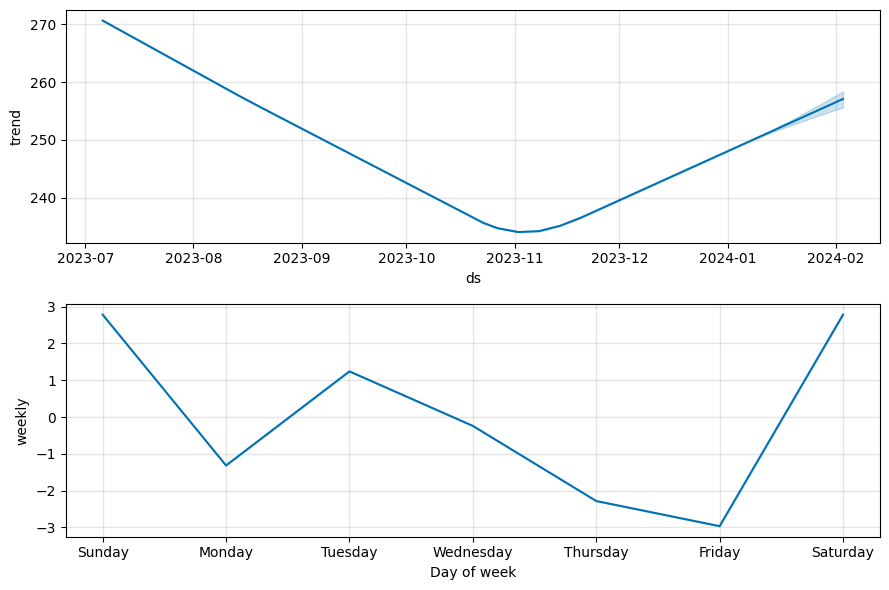

In [26]:
fig2 = m.plot_components(forecast)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-06,270.661294,247.621955,288.066023,270.661294,270.661294,-2.281616,-2.281616,-2.281616,-2.281616,-2.281616,-2.281616,0.0,0.0,0.0,268.379678
1,2023-07-07,270.327135,247.164556,285.604425,270.327135,270.327135,-2.965223,-2.965223,-2.965223,-2.965223,-2.965223,-2.965223,0.0,0.0,0.0,267.361912
2,2023-07-10,269.324657,249.634478,288.331365,269.324657,269.324657,-1.315834,-1.315834,-1.315834,-1.315834,-1.315834,-1.315834,0.0,0.0,0.0,268.008823
3,2023-07-11,268.990497,249.856179,289.489540,268.990497,268.990497,1.240994,1.240994,1.240994,1.240994,1.240994,1.240994,0.0,0.0,0.0,270.231491
4,2023-07-12,268.656338,250.350969,288.054675,268.656338,268.656338,-0.240664,-0.240664,-0.240664,-0.240664,-0.240664,-0.240664,0.0,0.0,0.0,268.415674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2024-01-30,255.985420,237.580453,274.587406,254.804418,257.016308,1.240994,1.240994,1.240994,1.240994,1.240994,1.240994,0.0,0.0,0.0,257.226414
153,2024-01-31,256.259389,237.244855,276.043965,255.018811,257.376436,-0.240664,-0.240664,-0.240664,-0.240664,-0.240664,-0.240664,0.0,0.0,0.0,256.018725
154,2024-02-01,256.533358,233.054217,274.710222,255.213841,257.712135,-2.281616,-2.281616,-2.281616,-2.281616,-2.281616,-2.281616,0.0,0.0,0.0,254.251742
155,2024-02-02,256.807327,233.787807,272.393161,255.424704,258.064532,-2.965223,-2.965223,-2.965223,-2.965223,-2.965223,-2.965223,0.0,0.0,0.0,253.842104


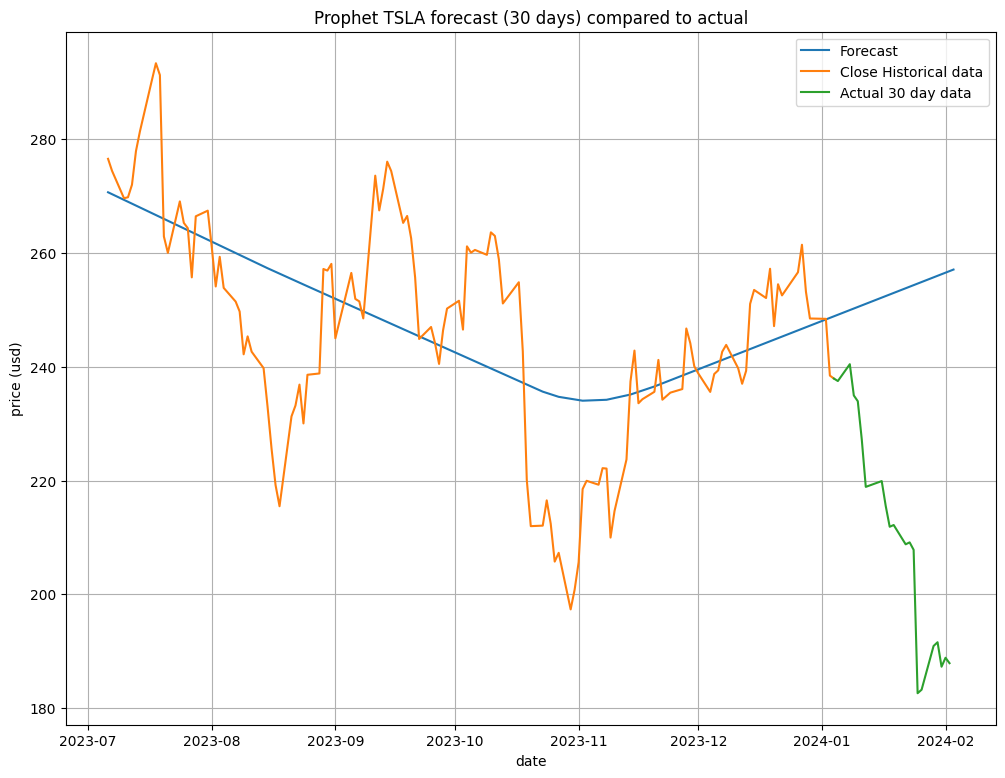

In [28]:
x = np.linspace(127,127+30,30)
plt.figure(figsize = (12,9))
plt.plot(forecast['ds'],forecast['trend']);
plt.grid()
plt.plot(df_TSLA['ds'],df_TSLA['y'])
plt.plot(df_TSLA_comp['Close']);
plt.title("Prophet TSLA forecast (30 days) compared to actual");
plt.xlabel("date");
plt.ylabel("price (usd)");
plt.legend(["Forecast","Close Historical data", "Actual 30 day data"]);

In [29]:
df_TSLA_comp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300
2024-01-05,236.860001,240.119995,234.899994,237.490005,237.490005,92379400
2024-01-08,236.139999,241.250000,235.300003,240.449997,240.449997,85166600
2024-01-09,238.110001,238.960007,232.039993,234.960007,234.960007,96705700
2024-01-10,235.100006,235.500000,231.289993,233.940002,233.940002,91628500
2024-01-11,230.570007,230.929993,225.369995,227.220001,227.220001,105873600
2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000
2024-01-16,215.100006,223.490005,212.179993,219.910004,219.910004,115355000
2024-01-17,214.860001,215.669998,212.009995,215.550003,215.550003,103164400


# 30 day data for 5 day forecast:

In [30]:
df_TSLA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_1month_data.csv')#, index_col = 'Date')
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);
# df_TSLA = df_TSLA.drop(columns='Date')
#df_TSLA.rename(columns={'Date':'DS','Close':'Y'})
df_TSLA

,Date,Close
0,2023-12-01,238.830002
1,2023-12-02,238.830002
2,2023-12-03,238.830002
3,2023-12-04,235.580002
4,2023-12-05,238.720001
5,2023-12-06,239.369995
6,2023-12-07,242.639999
7,2023-12-08,243.839996
8,2023-12-09,243.839996
9,2023-12-10,243.839996


In [31]:
df_TSLA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_comp.csv')#, index_col = 'Date')
df_TSLA_comp = df_TSLA_comp.drop(labels=range(len(df_TSLA_comp.index)-16, len(df_TSLA_comp)), axis=0)
df_TSLA_comp.index = pd.to_datetime(df_TSLA_comp['Date']);
df_TSLA_comp

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2024-01-04,2024-01-04,239.250000,242.699997,237.729996,237.929993,237.929993,102629300
2024-01-05,2024-01-05,236.860001,240.119995,234.899994,237.490005,237.490005,92379400
2024-01-08,2024-01-08,236.139999,241.250000,235.300003,240.449997,240.449997,85166600
2024-01-09,2024-01-09,238.110001,238.960007,232.039993,234.960007,234.960007,96705700
2024-01-10,2024-01-10,235.100006,235.500000,231.289993,233.940002,233.940002,91628500


In [32]:
df_TSLA = df_TSLA.rename(columns={'Date':'ds','Close':'y'})
m = Prophet()
df_TSLA['ds'] = pd.to_datetime(df_TSLA['ds'])
m = Prophet()
m.fit(df_TSLA)
future = m.make_future_dataframe(periods=6)
forecast = m.predict(future)

06:02:57 - cmdstanpy - INFO - Chain [1] start processing


06:02:57 - cmdstanpy - INFO - Chain [1] done processing


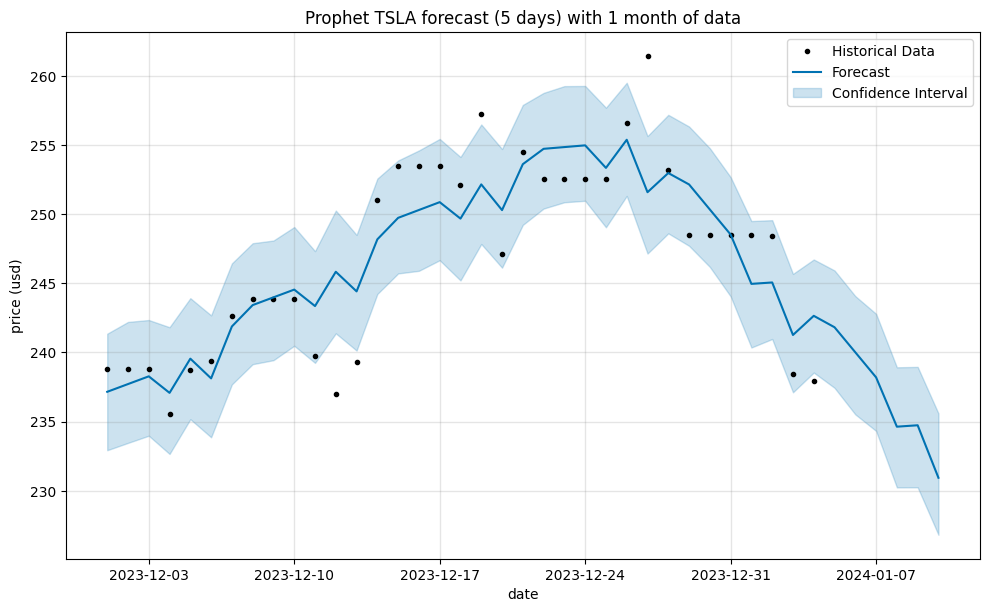

In [33]:
fig1 = m.plot(forecast)
plt.title("Prophet TSLA forecast (5 days) with 1 month of data");
plt.xlabel("date");
plt.ylabel("price (usd)");
plt.legend(["Historical Data", "Forecast", "Confidence Interval"], loc="best")

In [34]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

           ds        yhat  yhat_lower  yhat_upper
31 2024-01-01  244.960650  240.359675  249.502934
32 2024-01-02  245.062471  240.973754  249.567177
33 2024-01-03  241.266009  237.120087  245.681510
34 2024-01-04  242.650333  238.549456  246.723332
35 2024-01-05  241.824435  237.443751  245.929614
36 2024-01-06  240.013059  235.523388  244.076658
37 2024-01-07  238.201576  234.329172  242.794436
38 2024-01-08  234.636183  230.246627  238.929152
39 2024-01-09  234.738004  230.251871  238.958854
40 2024-01-10  230.941542  226.820210  235.594389


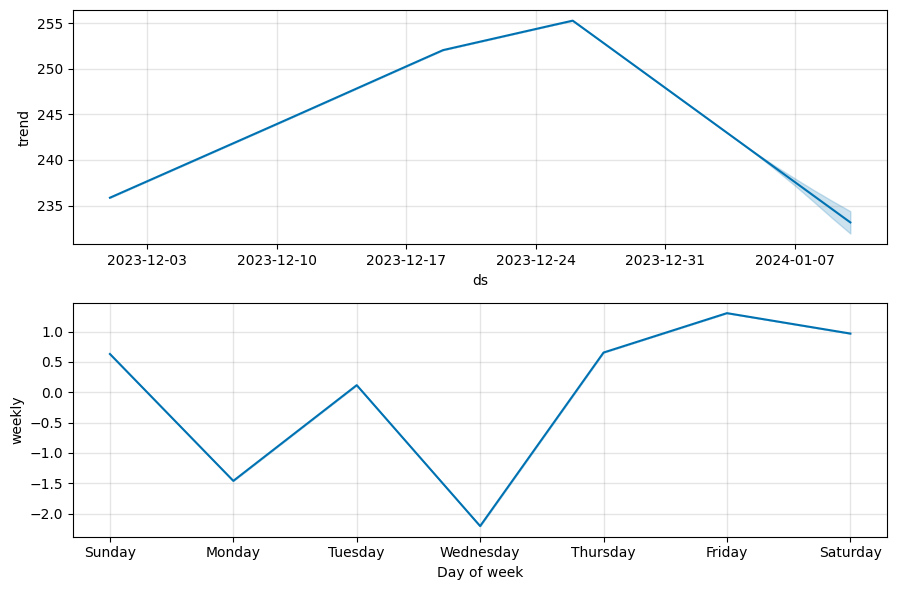

In [35]:
fig2 = m.plot_components(forecast)

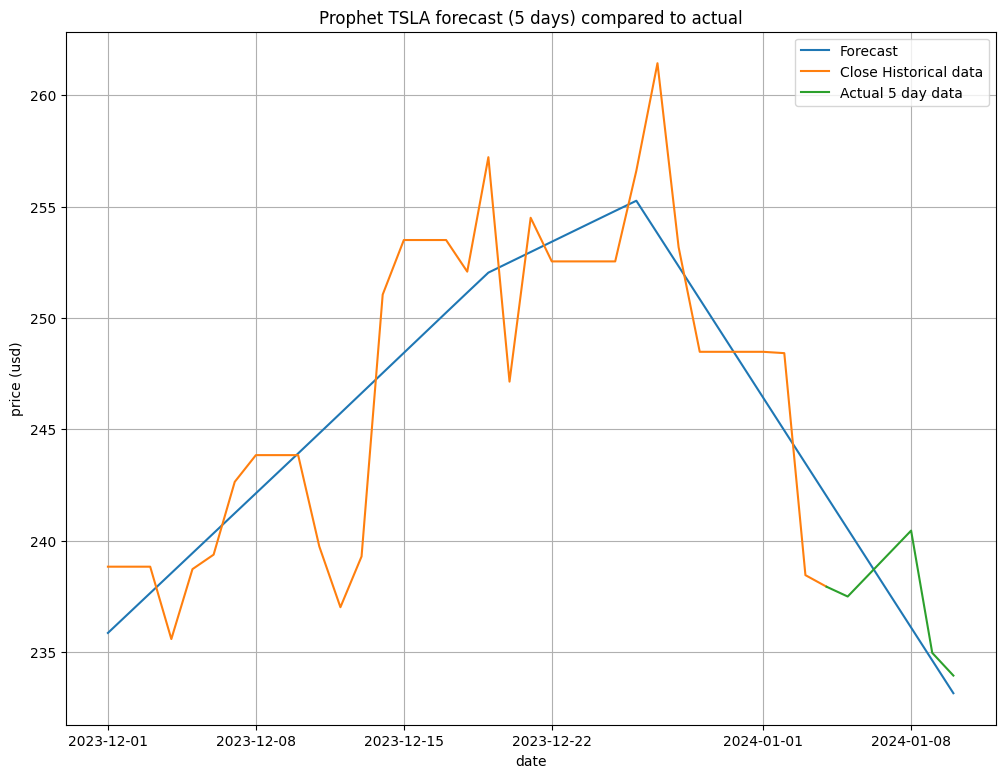

In [41]:
x = np.linspace(127,127+30,30)
plt.figure(figsize = (12,9))
plt.plot(forecast['ds'],forecast['trend']);
plt.grid()
plt.plot(df_TSLA['ds'],df_TSLA['y'])
plt.plot(df_TSLA_comp['Close']);
plt.title("Prophet TSLA forecast (5 days) compared to actual");
plt.xlabel("date");
plt.ylabel("price (usd)");
plt.legend(["Forecast","Close Historical data", "Actual 5 day data"]);

In [37]:
from sklearn.metrics import r2_score

forecast['ds'] = pd.to_datetime(forecast['ds'])

df_TSLA_comp['Date'] = pd.to_datetime(df_TSLA_comp['Date'])

df_combined = forecast.set_index('ds').join(df_TSLA_comp.set_index('Date')['Close'], how='inner').reset_index()

# Now calculate R² score only for the aligned dates
r2 = r2_score(df_combined['Close'], df_combined['yhat'])

# You can print the R² score or add it to your plot
print(f"The R² score of the forecast is: {r2}")

The R² score of the forecast is: -2.1637590040354926


In [38]:
df_combined_filtered = df_combined[['index','trend','yhat','Close']]
df_combined_filtered

,index,trend,yhat,Close
0,2024-01-04,241.996933,242.650333,237.929993
1,2024-01-05,240.522009,241.824435,237.490005
2,2024-01-08,236.097238,234.636183,240.449997
3,2024-01-09,234.622314,234.738004,234.960007
4,2024-01-10,233.147390,230.941542,233.940002


In [39]:
# Now calculate R² score only for the aligned dates
r2 = r2_score(df_combined['Close'], df_combined['trend'])

# You can print the R² score or add it to your plot
print(f"The R² score of the forecast is: {r2}")

The R² score of the forecast is: -0.7126066285237911
